<a href="https://colab.research.google.com/github/marvelsai/project-of-clustering-moons/blob/main/Saikiran_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [3]:
# check the dataset

data_

(array([[ 1.93969262e+00,  1.57979857e-01],
        [-3.86345126e-01,  9.22354294e-01],
        [ 4.46079936e-01, -3.32569855e-01],
        [ 3.27067963e-01,  9.45000819e-01],
        [ 1.42016587e-01, -1.36773916e-02],
        [ 5.00000000e-01,  8.66025404e-01],
        [ 1.11083820e+00, -4.93838464e-01],
        [ 1.91610846e+00,  9.90694646e-02],
        [-9.39692621e-01,  3.42020143e-01],
        [ 6.43113778e-01, -4.34147860e-01],
        [-9.81928697e-01,  1.89251244e-01],
        [ 6.03073792e-02,  1.57979857e-01],
        [ 1.80527026e+00, -9.29079291e-02],
        [ 2.01332353e-03,  4.36576080e-01],
        [ 4.15415013e-01,  9.09631995e-01],
        [ 1.58746467e-01, -4.06408175e-02],
        [-9.67948701e-01,  2.51147987e-01],
        [-9.95471923e-01,  9.50560433e-02],
        [-7.01474888e-01,  7.12694171e-01],
        [ 2.00000000e+00,  5.00000000e-01],
        [ 1.94729742e-01, -9.29079291e-02],
        [ 8.38915426e-02,  9.90694646e-02],
        [ 4.52807743e-03,  4.049

In [4]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [5]:
inputData.head()

,0,1
0,1.939693,0.157980
1,-0.386345,0.922354
2,0.446080,-0.332570
3,0.327068,0.945001
4,0.142017,-0.013677


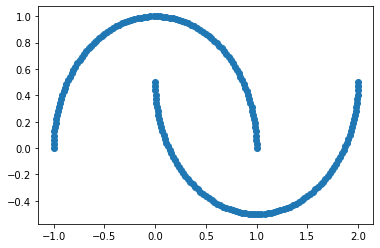

In [6]:
plt.scatter(inputData[0], inputData[1])

In [7]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,0
2,1
3,0
4,1


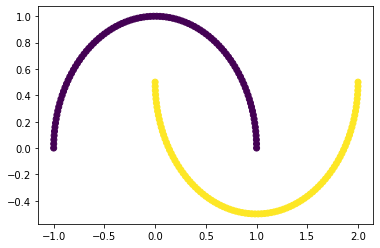

In [8]:
# create a scatter plot for inputData set with outputData color

plt.scatter(inputData[0], inputData[1], c = outputData)

In [9]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# check for labels

model.labels_

array([1, 0, 4, 0, 4, 2, 4, 1, 3, 4, 3, 0, 1, 0, 0, 4, 3, 3, 3, 1, 4, 4,
       0, 4, 0, 1, 0, 2, 1, 1, 0, 3, 2, 1, 3, 2, 1, 1, 0, 2, 4, 1, 4, 1,
       1, 3, 1, 3, 0, 4, 3, 2, 0, 0, 4, 1, 3, 1, 0, 4, 4, 3, 4, 3, 0, 1,
       0, 3, 4, 2, 4, 3, 3, 0, 0, 3, 1, 2, 0, 0, 0, 4, 1, 4, 3, 1, 3, 4,
       3, 0, 3, 4, 2, 3, 1, 4, 4, 2, 1, 0, 2, 0, 2, 2, 4, 0, 2, 3, 3, 4,
       2, 0, 4, 1, 4, 0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 2, 1, 1, 2, 3, 4, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 4, 0, 4, 4, 1, 4, 0, 3, 2, 0, 0, 3,
       4, 2, 0, 4, 2, 0, 0, 0, 2, 4, 2, 4, 0, 4, 4, 1, 4, 0, 4, 3, 2, 2,
       1, 2, 0, 1, 4, 4, 2, 1, 1, 3, 0, 3, 1, 1, 1, 3, 4, 4, 1, 2, 2, 3,
       2, 4], dtype=int32)

In [11]:
from sklearn import metrics

In [12]:
# call metrics and check silhoutte score

metrics.silhouette_score(inputData, model.labels_)

0.4837796919439832

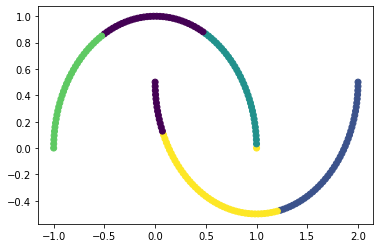

In [13]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [14]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=5)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

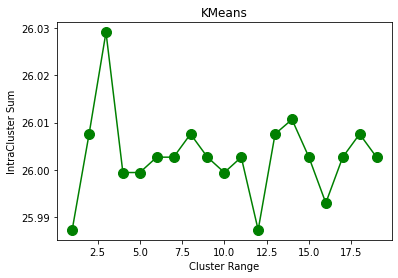

In [15]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()